# Credit Risk Model - Classification Problem

In [3]:
# Import the libraries 

import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Set numbers to two decimal places & NumPy setting that tells Python to suppress scientific notation

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [5]:
# import the dataset 

df_customers = pd.read_csv(r"dataset/customers.csv")
df_loans = pd.read_csv(r"dataset/loans.csv")
df_bureau = pd.read_csv(r"dataset/bureau_data.csv")

In [6]:
# Check the first 5 rows from the all three datasets create Dict

datasets = {
          'Customers' : df_customers, 
          'Loans'  : df_loans, 
          'Bureau' : df_bureau

}

In [7]:
# Create forloop to display at once 
for name, df in datasets.items():
    print(f"\n {name} Dataset (Top 5 Rows)")
    display(df.head(5))


 Customers Dataset (Top 5 Rows)


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001



 Loans Dataset (Top 5 Rows)


,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False



 Bureau Dataset (Top 5 Rows)


,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [8]:
## Check the shape of the datasets 

df_customers.shape, df_loans.shape , df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [9]:
# Merge loans and bureau to customers based on keys 

df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(5)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [10]:
df = pd.merge(df,df_bureau,on = 'cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [11]:
# Find the column types 
# Show full content in each column
pd.set_option('display.width', 1000)

In [12]:
display(df.dtypes)

cust_id                         object
age                              int64
gender                          object
marital_status                  object
employment_status               object
income                           int64
number_of_dependants             int64
residence_type                  object
years_at_current_address         int64
city                            object
state                           object
zipcode                          int64
loan_id                         object
loan_purpose                    object
loan_type                       object
sanction_amount                  int64
loan_amount                      int64
processing_fee                 float64
gst                              int64
net_disbursement                 int64
loan_tenure_months               int64
principal_outstanding            int64
bank_balance_at_application      int64
disbursal_date                  object
installment_start_dt            object
default                  

In [13]:
#Convert the default target variables to int

df['default']=df['default'].astype(int)
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

## Train & Test Split
-Highlighting Data Leakage concept

In [14]:
X = df.drop("default", axis=1)
y = df['default']

X_train,X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [15]:
# Create train & test datasets

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [16]:
## Check shape of df_train and df_test 

df_train.shape , df_test.shape

((37500, 33), (12500, 33))

# Data Cleaning

In [17]:
df_train.isna().sum()# Drop the rows with missing

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [18]:
# Check the mode of residence_type to fill na to train set

df_train['residence_type'] = df_train['residence_type'].fillna(df_train['residence_type'].mode()[0])

In [19]:
df_train.isnull().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [20]:
# Check the mode of residence_type to fill na to test set

df_test['residence_type'] = df_test['residence_type'].fillna(df_test['residence_type'].mode()[0])


### Conduct EDA on train dataset

In [21]:
# For numeric columns (both int and float)
numeric_cols_train = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# For object or categorical columns
categorical_cols_train = df_train.select_dtypes(include='object').columns.tolist()

In [22]:
numeric_cols_train

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio',
 'default']

In [23]:
categorical_cols_train

['cust_id',
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_id',
 'loan_purpose',
 'loan_type',
 'disbursal_date',
 'installment_start_dt']

### Box Plot to see the outliers 

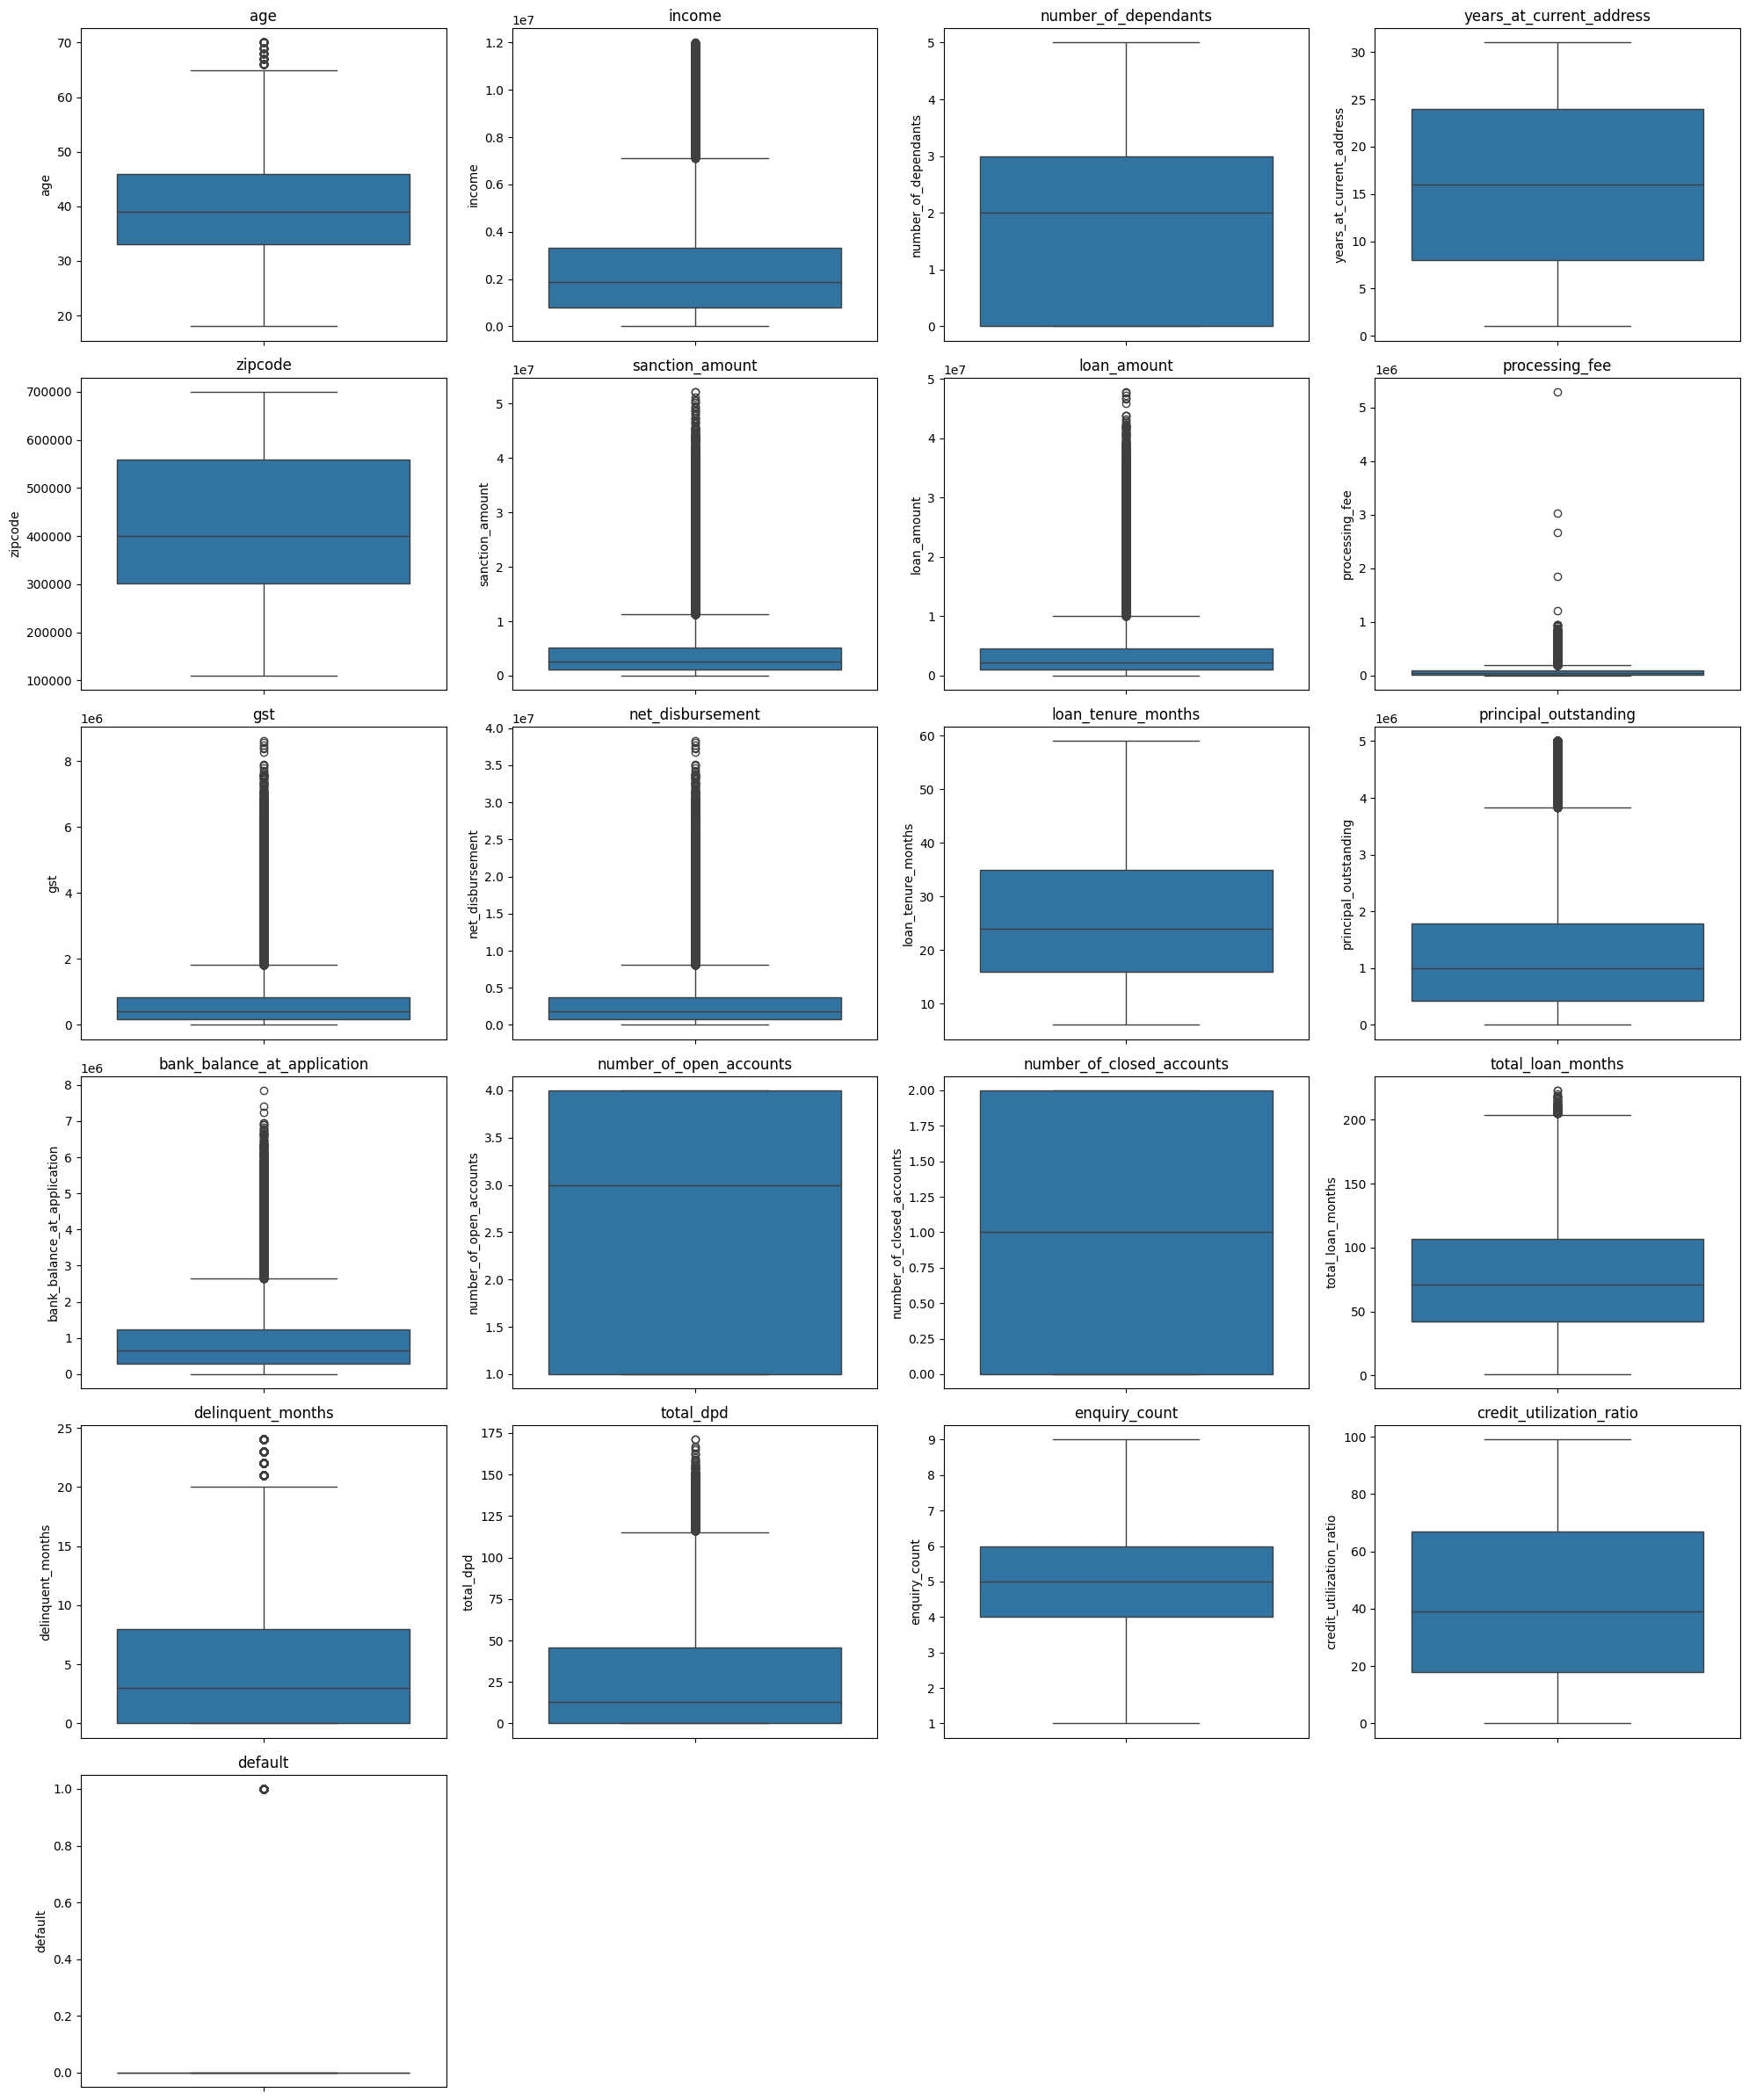

In [24]:
# Setup layout
import math

# Get number of plots and calculate rows needed
num_plots = len(numeric_cols_train)
cols_per_row = 4
rows = math.ceil(num_plots / cols_per_row)

# Set figure size
plt.figure(figsize=(cols_per_row * 5, rows * 4))  # Adjust figure size as needed

# Loop through each numeric column and create boxplot
# Plot each boxplot using seaborn
for i, col in enumerate(numeric_cols_train, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(data=df_train, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [25]:
# Histogram to see the distribution

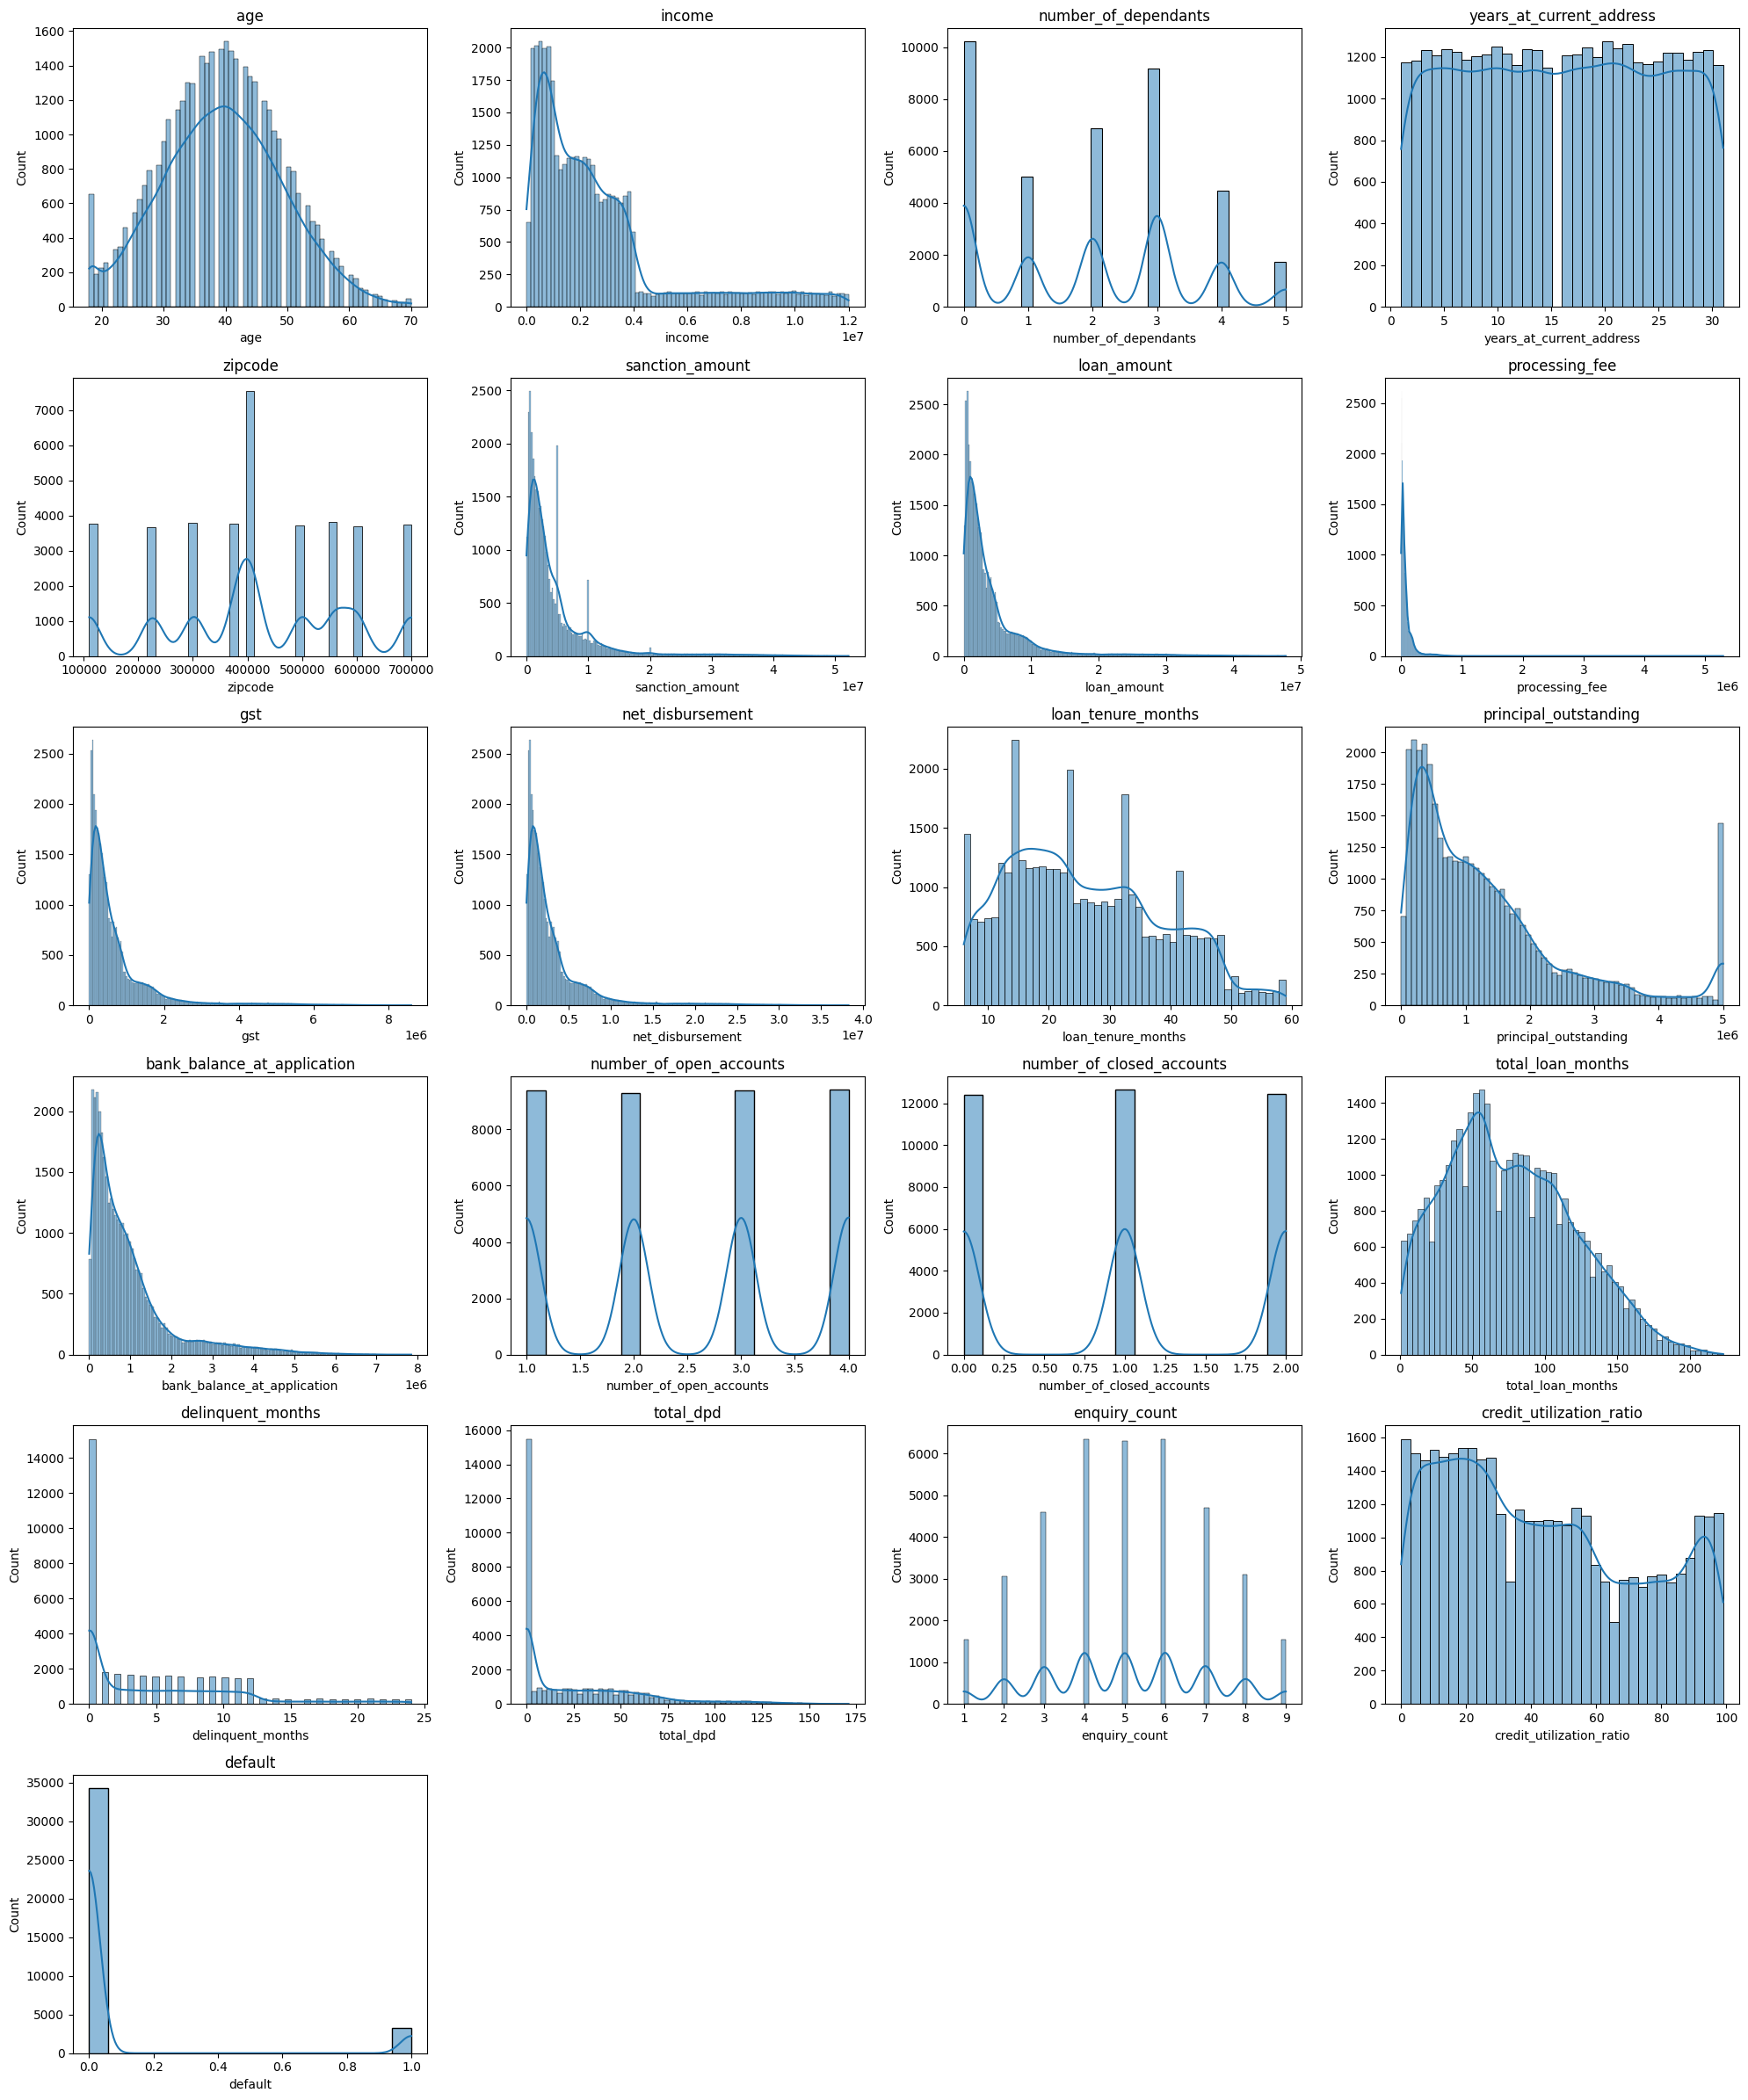

In [26]:
# Get number of plots and calculate rows needed
# Calculate number of plots and rows
num_plots = len(numeric_cols_train)
cols_per_row = 4
rows = math.ceil(num_plots / cols_per_row)

# Set figure size
plt.figure(figsize=(cols_per_row * 5, rows * 4))

# Loop to plot histograms vertically
for i, col in enumerate(numeric_cols_train, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(data=df_train, x=col, kde=True)  # Changed to x=col
    plt.title(col)

plt.tight_layout()
plt.show()

In [27]:
# Processing fees is tight to one end of the distribution and at other end

df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

## Check the outliers processing_fee columns
## Business rule (processing/loan_amount) ratio > 3% should be filtered

In [28]:
df_train[(df_train['processing_fee']/df_train['loan_amount'])>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [29]:
df_test[(df_test['processing_fee']/df_test['loan_amount'])>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee
33705,3812000,5678020.86
12294,4639000,5698029.90


In [30]:
# Filter these records and store to new train dataset 
df_train_1 = df_train[(df_train['processing_fee']/df_train['loan_amount'])<0.03].copy()

In [31]:
# Apply the same concept to test datasets 

df_test_1 = df_test[(df_test['processing_fee']/df_test['loan_amount'])<0.03].copy()

In [32]:
df_train_1.shape, df_test_1.shape

((37488, 33), (12497, 33))

### Analyse & Clean categorical columns 

In [33]:
for col in categorical_cols_train:
    print(col, "-->",df_train_1[col].unique())

cust_id --> ['C12747' 'C32496' 'C43676' ... 'C45237' 'C49229' 'C37785']
gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
loan_id --> ['L12747' 'L32496' 'L43676' ... 'L45237' 'L49229' 'L37785']
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
disbursal_date --> ['2020-10-31' '2022-10-22' '2023-12-04' ... '2022-02-07' '2019-10-30'
 '2022-10-04']
installment_start_dt --> ['2020-11-11' '2022-10-27' '2023-12-29' ... '2024-08-19' '2019-07-28'
 '2019-07-25']


In [34]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_test_1['loan_purpose'] = df_test_1['loan_purpose'].replace('Personaal', 'Personal')

In [35]:
# Check the changes 
print(f"Check the train dataset Loan purpose column: {df_train_1['loan_purpose'].unique()}")
print(f"Check the test dataset Loan purpose column:{df_test_1['loan_purpose'].unique()}")

Check the train dataset Loan purpose column: ['Home' 'Education' 'Personal' 'Auto']
Check the test dataset Loan purpose column:['Home' 'Education' 'Auto' 'Personal']


### Exploratory Data Analysis

In [36]:
numeric_cols_train

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio',
 'default']

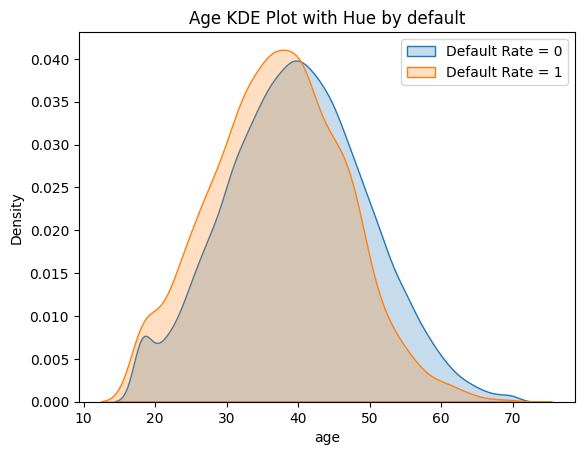

In [39]:
# Conduct Bivariate Analysis using Kde plot to see the distribution of default rate with age 

sns.kdeplot(df_train_1[df_train_1['default']==0]['age'], fill=True, label='Default Rate = 0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['age'], fill=True, label='Default Rate = 1')
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

Insights 

1) Orange graph is little bit shifted to the left of blue graph which indicates that peiple with young age are more likely to default. 

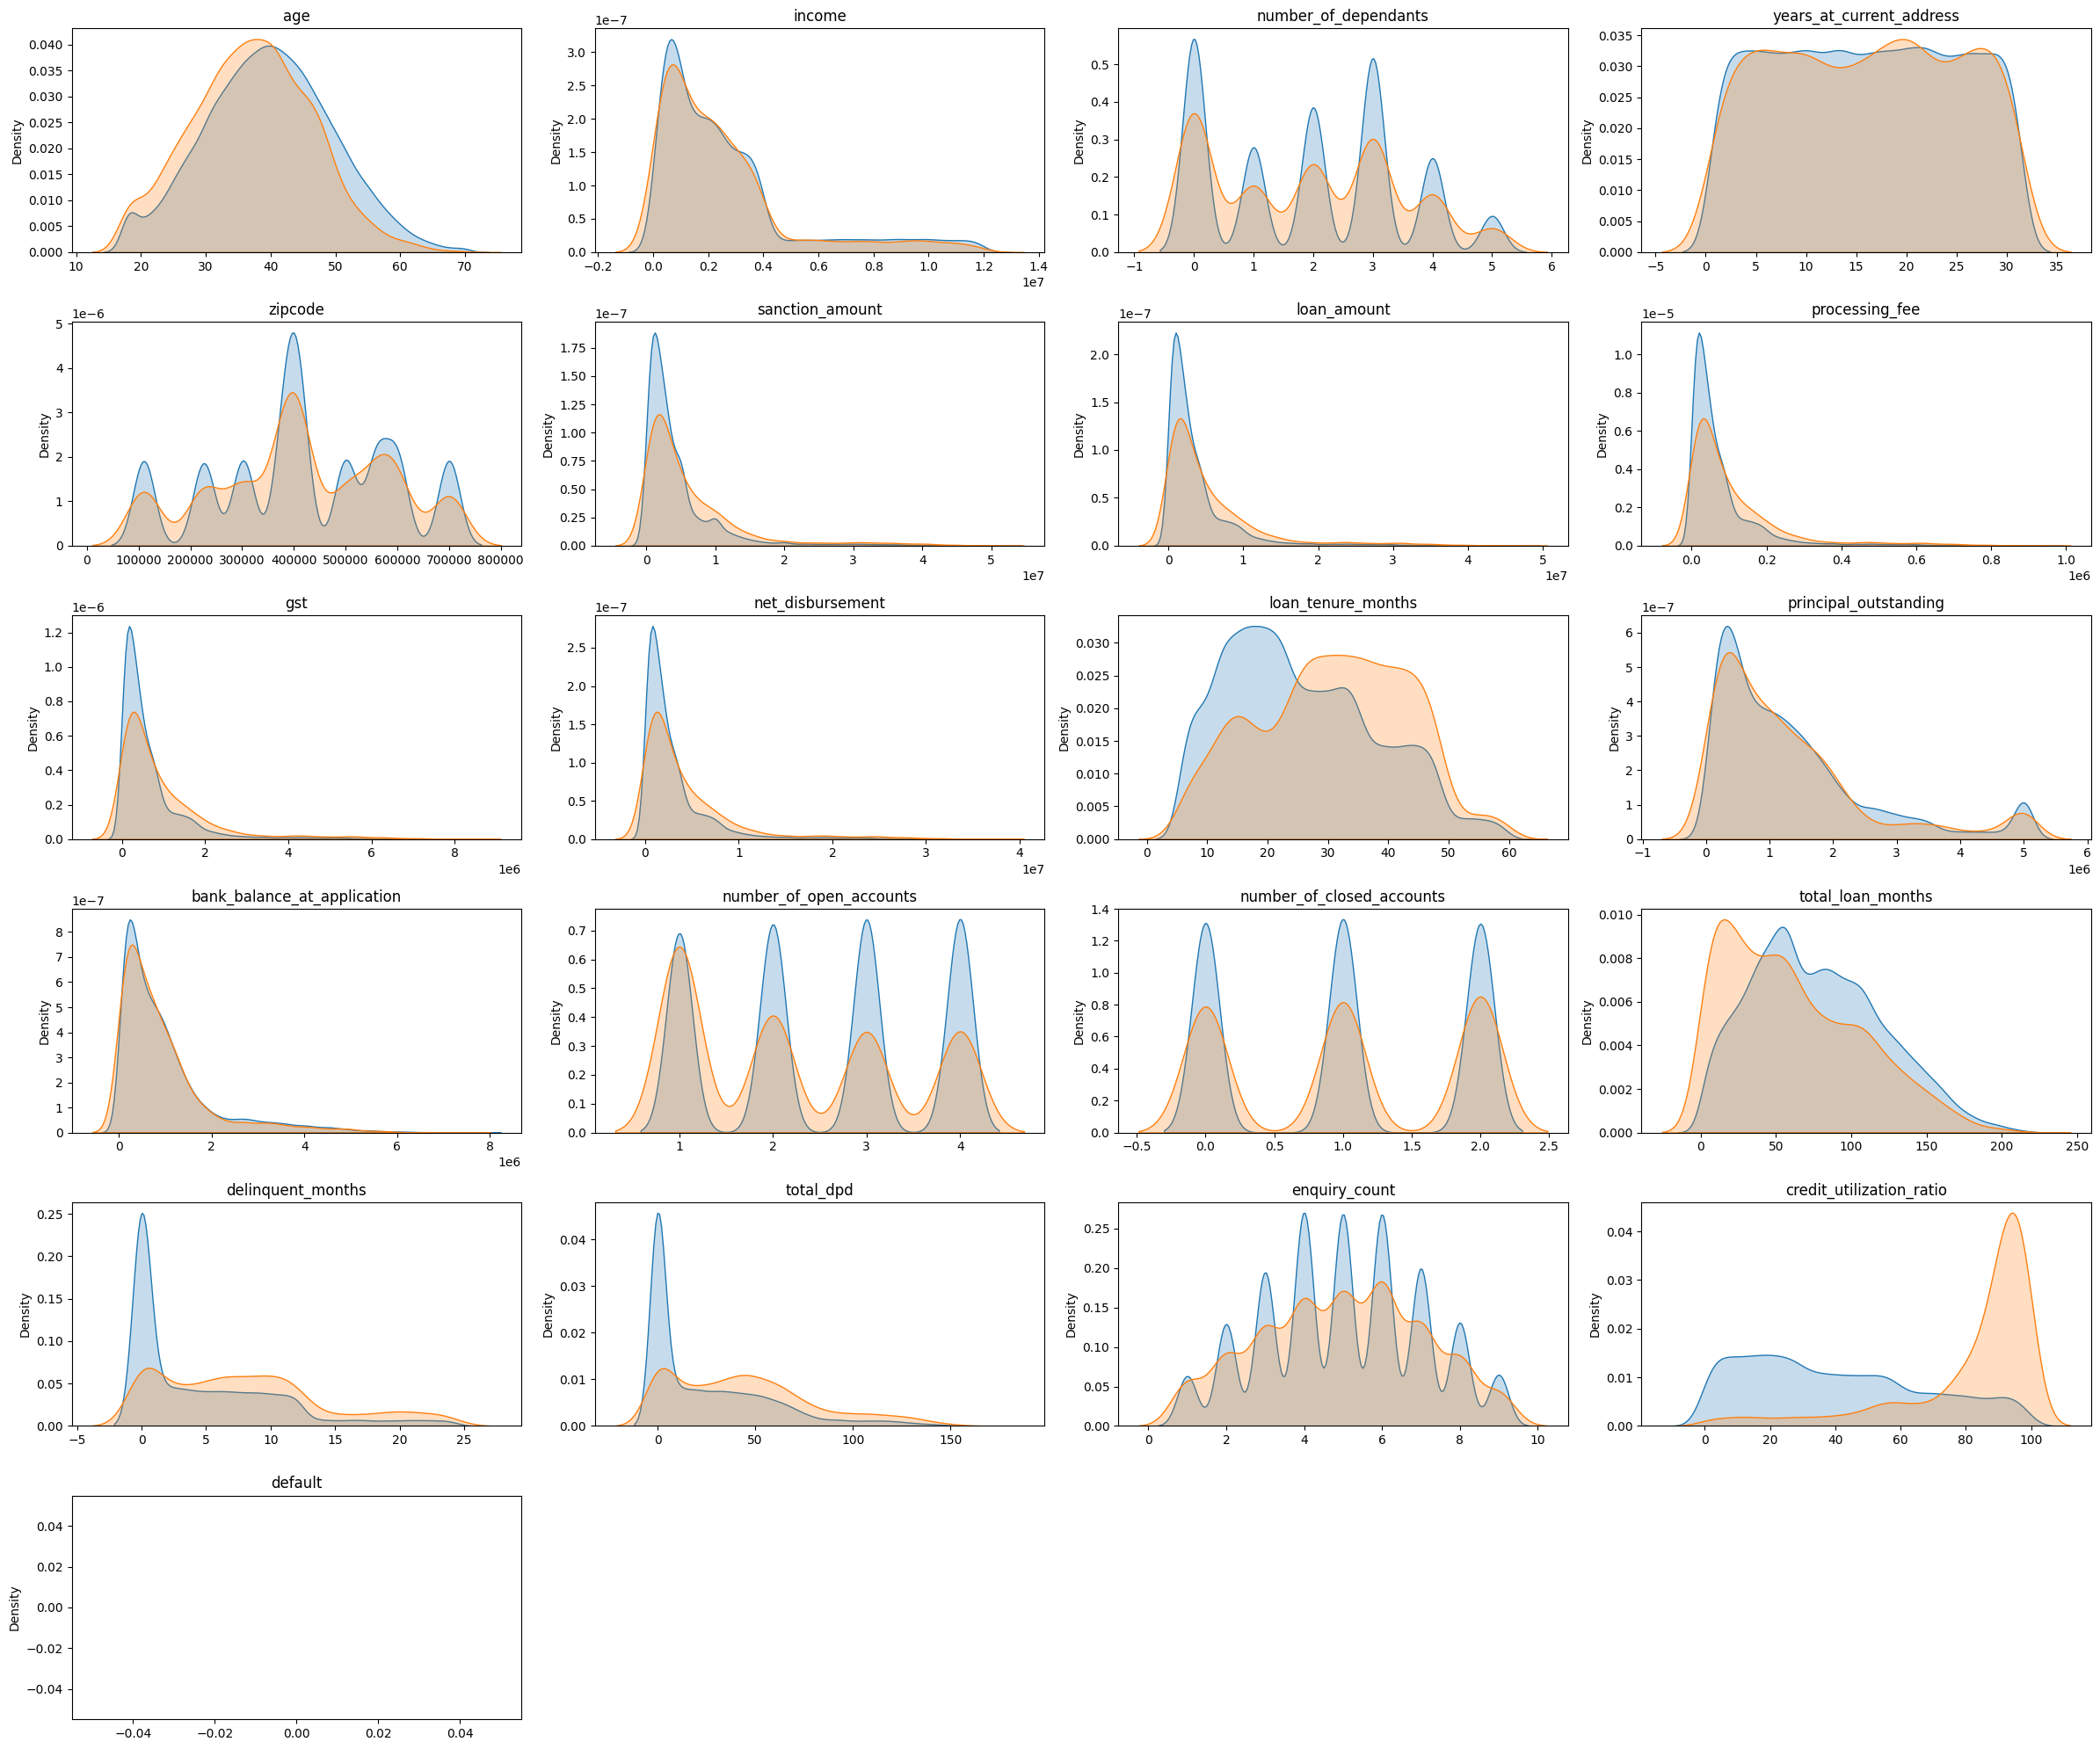

In [42]:
# Analyse the charts for all contineous column in one graph to see the distribution 

plt.figure(figsize=(24,20)) 

for i, col in enumerate(numeric_cols_train):
    plt.subplot(6,4,i+1)
    sns.kdeplot(df_train_1[col][df_train_1['default']==0],fill=True,label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1],fill=True,label='default=1')
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

Insights 

1) Credit Utilization ratio , Age and Loan_tenure_months are the strongest factor for default analysing the credit risk dataset